In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import random
import os
from tqdm.auto import tqdm as tq
import warnings
import albumentations as A
warnings.filterwarnings('ignore')

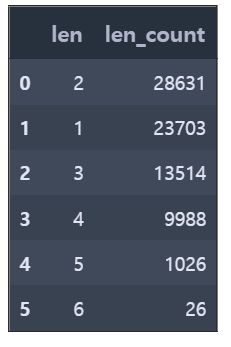

In [8]:
df = pd.read_csv('./data/train.csv')
df['len'] = df['label'].str.len()
df['img_path'] = df['img_path'].str.replace("./train", "/home/gyuseonglee/workspace/2301_OCR/data/train")

ones = df[df['len']==1].reset_index()
twos = df[df['len']==2].reset_index()
threes = df[df['len']==3].reset_index()
fours = df[df['len']==4].reset_index()
del ones['index'], twos['index'], threes['index'], fours['index']

index_1 = sorted(ones.index.tolist())
index_2 = sorted(twos.index.tolist())
index_3 = sorted(threes.index.tolist())
index_4 = sorted(fours.index.tolist())

In [9]:
twos.head(3)

,id,img_path,label,len
0,TRAIN_00002,/home/gyuseonglee/workspace/2301_OCR/data/trai...,차차,2
1,TRAIN_00006,/home/gyuseonglee/workspace/2301_OCR/data/trai...,유월,2
2,TRAIN_00008,/home/gyuseonglee/workspace/2301_OCR/data/trai...,손뼉,2


In [10]:
def make_augmented_data(length, mode, height, width):
    if length == 3:     # 2 modes
        combinations = [
            (ones, twos),  #  1 + 2
            (twos, ones)   #  2 + 1
        ]
    elif length == 4:    # 3 modes
        combinations = [
            (ones, threes), # 1 + 3
            (twos, twos),   # 2 + 2
            (threes, ones), # 3 + 1
        ]
    elif length == 5:     # 7 modes
        combinations = [
            (ones, twos, twos), # 1 + 2 + 2
            (twos, ones, twos), # 2 + 1 + 2
            (twos, twos, ones), # 2 + 2 + 1
            (ones, fours),     # 1 + 4
            (twos, threes),    # 2 + 3
            (threes, twos),    # 3 + 2
            (fours, ones)      # 4 + 1
        ]
    elif length == 6:    # 9 modes
        combinations = [
            (ones, twos, threes),  # 1 + 2 + 3
            (ones, threes, twos),  # 1 + 3 + 2
            (twos, ones, threes),  # 2 + 1 + 3
            (twos, threes, ones),  # 2 + 3 + 1
            (threes, ones, twos),  # 3 + 1 + 2
            (threes, twos, ones),  # 3 + 2 + 1
            (twos, fours),         # 2 + 4
            (threes, threes),      # 3 + 3
            (fours, twos),         # 4 + 2
        ]
    comb = combinations[mode]
    indices = [random.choice(comb[idx].index.tolist()) for idx in range(len(comb))]
    label = "".join([comb[idx]['label'][indices[idx]] for idx in range(len(comb))])
    img = cv2.hconcat([cv2.imread(comb[idx]['img_path'][indices[idx]]) for idx in range(len(comb))])
    img = A.Resize(height, width)(image=img)['image']
    return img, label


In [35]:
len2_cnt = 20000-28631
len3_cnt = 20000-13514
len4_cnt = 20000-9988
len5_cnt = 20000-1026
len6_cnt = 20000-26
# print(f"len2_cnt : {len2_cnt}")
print(f"len3_cnt : {len3_cnt}")
print(f"len4_cnt : {len4_cnt}")
print(f"len5_cnt : {len5_cnt}")
print(f"len6_cnt : {len6_cnt}")

cnts = [
    len3_cnt,
    len4_cnt,
    len5_cnt,
    len6_cnt
]
lengths = [3,4,5,6]
num_modes = [2,3,7,9]

len3_cnt : 6486
len4_cnt : 10012
len5_cnt : 18974
len6_cnt : 19974


쿼강물


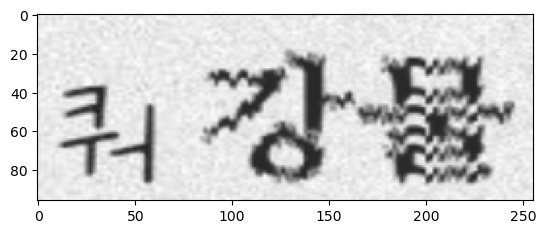

In [30]:
height = 96
width = 256
img, label = make_augmented_data(length=3, mode=0, height=height, width=width)
print(label)
plt.imshow(img)

In [39]:
df

,id,img_path,label,len
0,TRAIN_00000,/home/gyuseonglee/workspace/2301_OCR/data/trai...,빨간색,3
1,TRAIN_00001,/home/gyuseonglee/workspace/2301_OCR/data/trai...,머,1
2,TRAIN_00002,/home/gyuseonglee/workspace/2301_OCR/data/trai...,차차,2
3,TRAIN_00003,/home/gyuseonglee/workspace/2301_OCR/data/trai...,써,1
4,TRAIN_00004,/home/gyuseonglee/workspace/2301_OCR/data/trai...,놓치다,3
...,...,...,...,...
76883,TRAIN_76883,/home/gyuseonglee/workspace/2301_OCR/data/trai...,회,1
76884,TRAIN_76884,/home/gyuseonglee/workspace/2301_OCR/data/trai...,겪다,2
76885,TRAIN_76885,/home/gyuseonglee/workspace/2301_OCR/data/trai...,벨트,2
76886,TRAIN_76886,/home/gyuseonglee/workspace/2301_OCR/data/trai...,톼,1


In [47]:
def make_dir(directory:str):
    if not os.path.exists(directory):
        os.makedirs(directory)

idx = 0
folder = "./data/cutmix"
make_dir(folder)
name = f"CUTMIX_{idx}"
path = f"{folder}/{name}.png"
label = cur_label
path

'./data/cutmix/CUTMIX_0.png'

In [50]:
cv2.imwrite(path, img)

,id,img_path,label,len
0,TRAIN_00000,/home/gyuseonglee/workspace/2301_OCR/data/trai...,빨간색,3
1,TRAIN_00001,/home/gyuseonglee/workspace/2301_OCR/data/trai...,머,1
2,TRAIN_00002,/home/gyuseonglee/workspace/2301_OCR/data/trai...,차차,2
3,TRAIN_00003,/home/gyuseonglee/workspace/2301_OCR/data/trai...,써,1
4,TRAIN_00004,/home/gyuseonglee/workspace/2301_OCR/data/trai...,놓치다,3
...,...,...,...,...
76883,TRAIN_76883,/home/gyuseonglee/workspace/2301_OCR/data/trai...,회,1
76884,TRAIN_76884,/home/gyuseonglee/workspace/2301_OCR/data/trai...,겪다,2
76885,TRAIN_76885,/home/gyuseonglee/workspace/2301_OCR/data/trai...,벨트,2
76886,TRAIN_76886,/home/gyuseonglee/workspace/2301_OCR/data/trai...,톼,1


In [57]:
height = 96
width = 256

idx = 0
folder = "./data/cutmix"
make_dir(folder)
names = []
paths = []
labels = []
lens = []

num_img = 0
for cnt, length in tq(zip(cnts, lengths), total=len(cnts)):
    m=0
    for i in tq(range(cnt)):
        cur_img, cur_label = make_augmented_data(length=length, mode=m, height=height, width=width)
        m += 1
        m%=num_modes[idx]
        
        name = f"CUTMIX_{num_img}"
        path = f"{folder}/{name}.png"
        
        cv2.imwrite(path, cur_img)
        num_img += 1
        # id
        names.append(name)
        # img_path
        paths.append(path)
        # label
        labels.append(cur_label)
        # len
        lens.append(length)
    idx += 1
        

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6486 [00:00<?, ?it/s]

  0%|          | 0/10012 [00:00<?, ?it/s]

  0%|          | 0/18974 [00:00<?, ?it/s]

  0%|          | 0/19974 [00:00<?, ?it/s]

In [58]:
df

,id,img_path,label,len
0,TRAIN_00000,/home/gyuseonglee/workspace/2301_OCR/data/trai...,빨간색,3
1,TRAIN_00001,/home/gyuseonglee/workspace/2301_OCR/data/trai...,머,1
2,TRAIN_00002,/home/gyuseonglee/workspace/2301_OCR/data/trai...,차차,2
3,TRAIN_00003,/home/gyuseonglee/workspace/2301_OCR/data/trai...,써,1
4,TRAIN_00004,/home/gyuseonglee/workspace/2301_OCR/data/trai...,놓치다,3
...,...,...,...,...
76883,TRAIN_76883,/home/gyuseonglee/workspace/2301_OCR/data/trai...,회,1
76884,TRAIN_76884,/home/gyuseonglee/workspace/2301_OCR/data/trai...,겪다,2
76885,TRAIN_76885,/home/gyuseonglee/workspace/2301_OCR/data/trai...,벨트,2
76886,TRAIN_76886,/home/gyuseonglee/workspace/2301_OCR/data/trai...,톼,1


In [61]:
aug_df = pd.DataFrame([names, paths, labels, lens]).T
aug_df.columns = ["id", "img_path", "label", "len"]
aug_df

,id,img_path,label,len
0,CUTMIX_0,./data/cutmix/CUTMIX_0.png,그이상,3
1,CUTMIX_1,./data/cutmix/CUTMIX_1.png,손길배,3
2,CUTMIX_2,./data/cutmix/CUTMIX_2.png,출도움,3
3,CUTMIX_3,./data/cutmix/CUTMIX_3.png,수학핌,3
4,CUTMIX_4,./data/cutmix/CUTMIX_4.png,큐제자,3
...,...,...,...,...
55441,CUTMIX_55441,./data/cutmix/CUTMIX_55441.png,선생님공식적,6
55442,CUTMIX_55442,./data/cutmix/CUTMIX_55442.png,높아지다상추,6
55443,CUTMIX_55443,./data/cutmix/CUTMIX_55443.png,킨자료그다지,6
55444,CUTMIX_55444,./data/cutmix/CUTMIX_55444.png,나대학교회견,6


In [63]:
aug_df.to_csv("./data/cutmix.csv", index=False)